# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import warnings
from warnings import filterwarnings
filterwarnings('ignore')
import plotly.express as px

1. Pandas for data manipulation.
2. numpy for numerical operations.
3. matplotlib.pyplot for plotting.
4. seaborn for statistical graphics.
5. The glob module, which finds all the pathnames matching a specified pattern according to the rules used by the Unix shell. This can be particularly useful for retrieving files with specific naming patterns.
6. The warnings module, which provides a way to issue warnings in Python. These warnings can be helpful to alert the user of potentially problematic conditions in the code. 'filterwarnings' allows you to control what warnings are displayed, enabling you to ignore warnings if necessary. Ignore can make the output cleaner, it is important to use with caution as it may hide potential issues that need to be addressed.
7. plotly.express for interactive plots.

# Data Collection

glob.glob: Retrieves a list of file paths matching the specified pattern. In this case, it finds all CSV files in the directory /content/drive/MyDrive/Stock_Price_Datasets/individual_stocks_5yr/.

In [ ]:
glob.glob(r'/content/drive/MyDrive/Stock_Price_Datasets/individual_stocks_5yr/*csv')

len(glob.glob(...)): Counts the number of CSV files found in the specified directory.

In [ ]:
len(glob.glob(r'/content/drive/MyDrive/Stock_Price_Datasets/individual_stocks_5yr/*csv'))

509

company_list: Defines a list of file paths for specific stock data files (Apple, Amazon, Google, and Microsoft).

In [ ]:
company_list = [
    r'/content/drive/MyDrive/Stock_Price_Datasets/individual_stocks_5yr/AAPL_data.csv',
    r'/content/drive/MyDrive/Stock_Price_Datasets/individual_stocks_5yr/AMZN_data.csv',
    r'/content/drive/MyDrive/Stock_Price_Datasets/individual_stocks_5yr/GOOG_data.csv',
    r'/content/drive/MyDrive/Stock_Price_Datasets/individual_stocks_5yr/MSFT_data.csv'
]

all_data: Initializes an empty DataFrame to store combined data from the specified CSV files.

* for file in company_list: Loops through each file path in company_list.
* current_df = pd.read_csv(file): Reads the current CSV file into a DataFrame current_df.
* all_data = pd.concat([all_data, current_df], ignore_index=True): Concatenates current_df to all_data, updating all_data to include data from the current file. ignore_index=True ensures that the indices are reset.

In [ ]:
all_data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(file)
    all_data = pd.concat([all_data, current_df], ignore_index=True)

* all_data.shape: Displays the dimensions (rows, columns) of the combined DataFrame all_data.
* all_data.head(): Displays the first 5 rows of all_data to give an overview of the combined data.
* all_data['Name'].unique(): Retrieves the unique values in the 'Name' column of all_data, showing which companies are included.
* all_data.info(): Provides a summary of the DataFrame, including the number of non-null entries and the data type of each column.
* all_data.describe().T: Generates descriptive statistics for the numeric columns in all_data, transposed for better readability.

In [ ]:
all_data.shape
all_data.head()
all_data['Name'].unique()
all_data.info()
all_data.describe().T

# Analysing the change in price of the stock overtime

all_data.isnull().sum(): This calculates the sum of missing values for each column in the all_data DataFrame.

In [ ]:
all_data.isnull().sum()

all_data.dtypes: This returns the data types of each column in the all_data DataFrame.

In [ ]:
all_data.dtypes

all_data['date'] = pd.to_datetime(all_data['date']): This converts the 'date' column in the all_data DataFrame to datetime format using the pd.to_datetime() function.

In [ ]:
all_data['date'] = pd.to_datetime(all_data['date'])

all_data['date']: This accesses the 'date' column in the all_data DataFrame.

In [ ]:
all_data['date']

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
4747   2018-02-01
4748   2018-02-02
4749   2018-02-05
4750   2018-02-06
4751   2018-02-07
Name: date, Length: 4752, dtype: datetime64[ns]

tech_list = all_data['Name'].unique(): This creates a list of unique company names from the 'Name' column in the all_data DataFrame.


In [ ]:
tech_list = all_data['Name'].unique()
tech_list

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

* plt.figure(figsize=(20, 12)): This creates a new figure with a specified figure size for plotting.
* for index, company in enumerate(tech_list, 1): This iterates over the unique company names in tech_list using the enumerate() function, starting from index 1.
* plt.subplot(2, 2, index): This creates a subplot in a 2x2 grid layout at the position specified by index.
* filter1 = all_data['Name'] == company: This filters the all_data DataFrame for rows where the 'Name' column matches the current company name.
* df = all_data[filter1]: This creates a new DataFrame df containing data only for the current company.
* plt.plot(df['date'], df['close']): This plots the stock price ('close') against the date for the current company.
* plt.title(company): This sets the title of the subplot to the name of the current company.

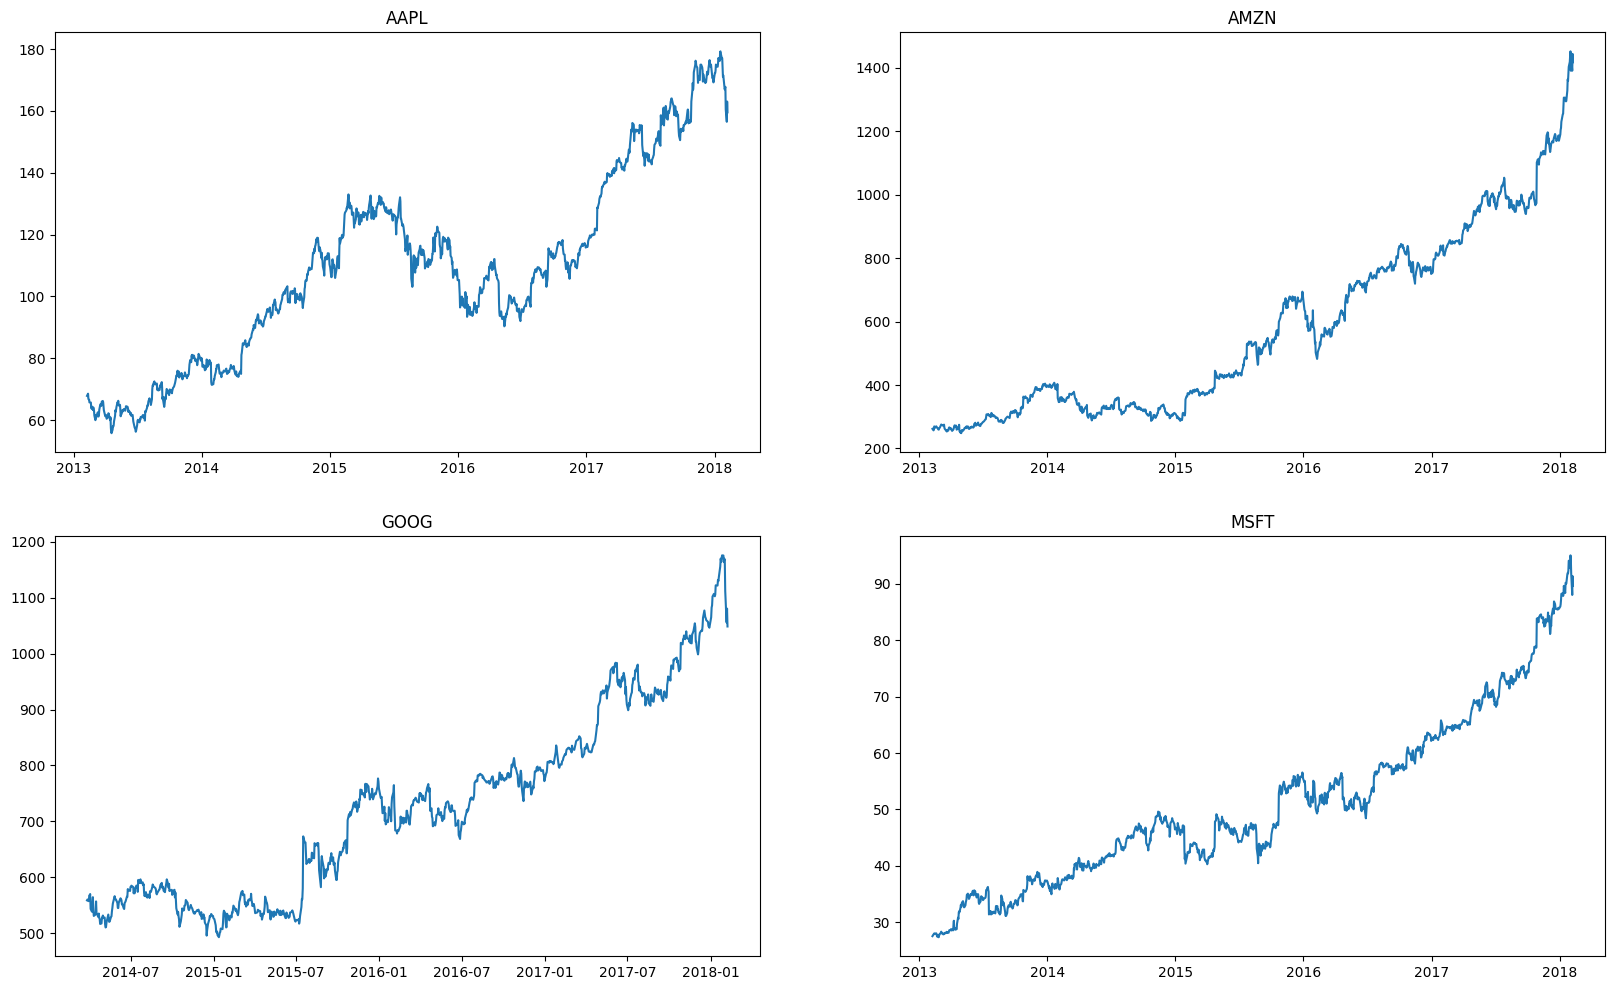

In [ ]:
plt.figure(figsize=(20, 12))

for index, company in enumerate (tech_list, 1):
    plt.subplot(2, 2, index)
    filter1 = all_data['Name'] == company
    df = all_data[filter1]
    plt.plot(df['date'], df['close'])
    plt.title(company)

# Moving Average of Various Stock

Displaying the first 10 rows of the all_data DataFrame.


In [ ]:
all_data.head(10)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL
6,2013-02-19,65.8714,66.1042,64.8356,65.7128,108854046,AAPL
7,2013-02-20,65.3842,65.3842,64.1142,64.1214,118891367,AAPL
8,2013-02-21,63.7142,64.1671,63.2599,63.7228,111596821,AAPL
9,2013-02-22,64.1785,64.5142,63.7999,64.4014,82583823,AAPL


Calculating the 10-day moving average for the 'close' column in all_data, displaying the first 14 rows of the result.

In [ ]:
all_data['close'].rolling(window=10).mean().head(14)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     66.03251
10    65.57280
11    65.13051
12    64.79722
13    64.43137
Name: close, dtype: float64

Creating a copy of the all_data DataFrame and assigns it to the variable new_data.

In [ ]:
new_data = all_data.copy()

Creating a list ma_day containing the moving average window lengths to be calculated.

Initiating a loop to calculate moving averages for each window length in ma_day. And calculating the moving average for each window length ma and creates a new column in new_data with the corresponding window length as part of the column name.

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
  new_data['close_'+str(ma)] = new_data['close'].rolling(ma).mean()

Displaying the last 8 rows of the new_data DataFrame.


In [ ]:
new_data.tail(8)

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
4744,2018-01-29,95.14,95.450,93.7200,93.92,31569940,MSFT,91.423,89.4685,86.3292
4745,2018-01-30,93.30,93.660,92.1000,92.74,38635053,MSFT,91.862,89.8285,86.5244
4746,2018-01-31,93.75,95.400,93.5100,95.01,48756338,MSFT,92.349,90.2815,86.7606
4747,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT,92.765,90.6770,86.9978
4748,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT,92.943,90.9105,87.1828
4749,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT,92.582,90.9010,87.2684
4750,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT,92.525,91.0535,87.4328
4751,2018-02-07,90.49,91.770,89.2000,89.61,41107592,MSFT,92.304,91.1230,87.5598


Setting the 'date' column as the index of the new_data DataFrame.

In [ ]:
new_data.set_index('date', inplace=True)

Displaying the new_data DataFrame.

In [ ]:
new_data

,open,high,low,close,volume,Name,close_10,close_20,close_50
date,,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,NaN,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,NaN,NaN,NaN
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,NaN,NaN,NaN
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,NaN,NaN,NaN
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2018-02-01,94.7900,96.0700,93.5813,94.2600,47227882,MSFT,92.765,90.6770,86.9978
2018-02-02,93.6400,93.9700,91.5000,91.7800,47867753,MSFT,92.943,90.9105,87.1828
2018-02-05,90.5600,93.2400,88.0000,88.0000,51031465,MSFT,92.582,90.9010,87.2684


Returns the column names of the new_data DataFrame.


In [ ]:
new_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close_10',
       'close_20', 'close_50'],
      dtype='object')

Creating a new figure with a specified figure size for plotting.

Iterate over the unique company names in tech_list, starting from index 1. And creating a subplot in a 2x2 grid layout at the position specified by index. Ploting the moving averages ('close_10', 'close_20', 'close_50') for the current company using the current subplot. And sets the title of the subplot to the name of the current company.

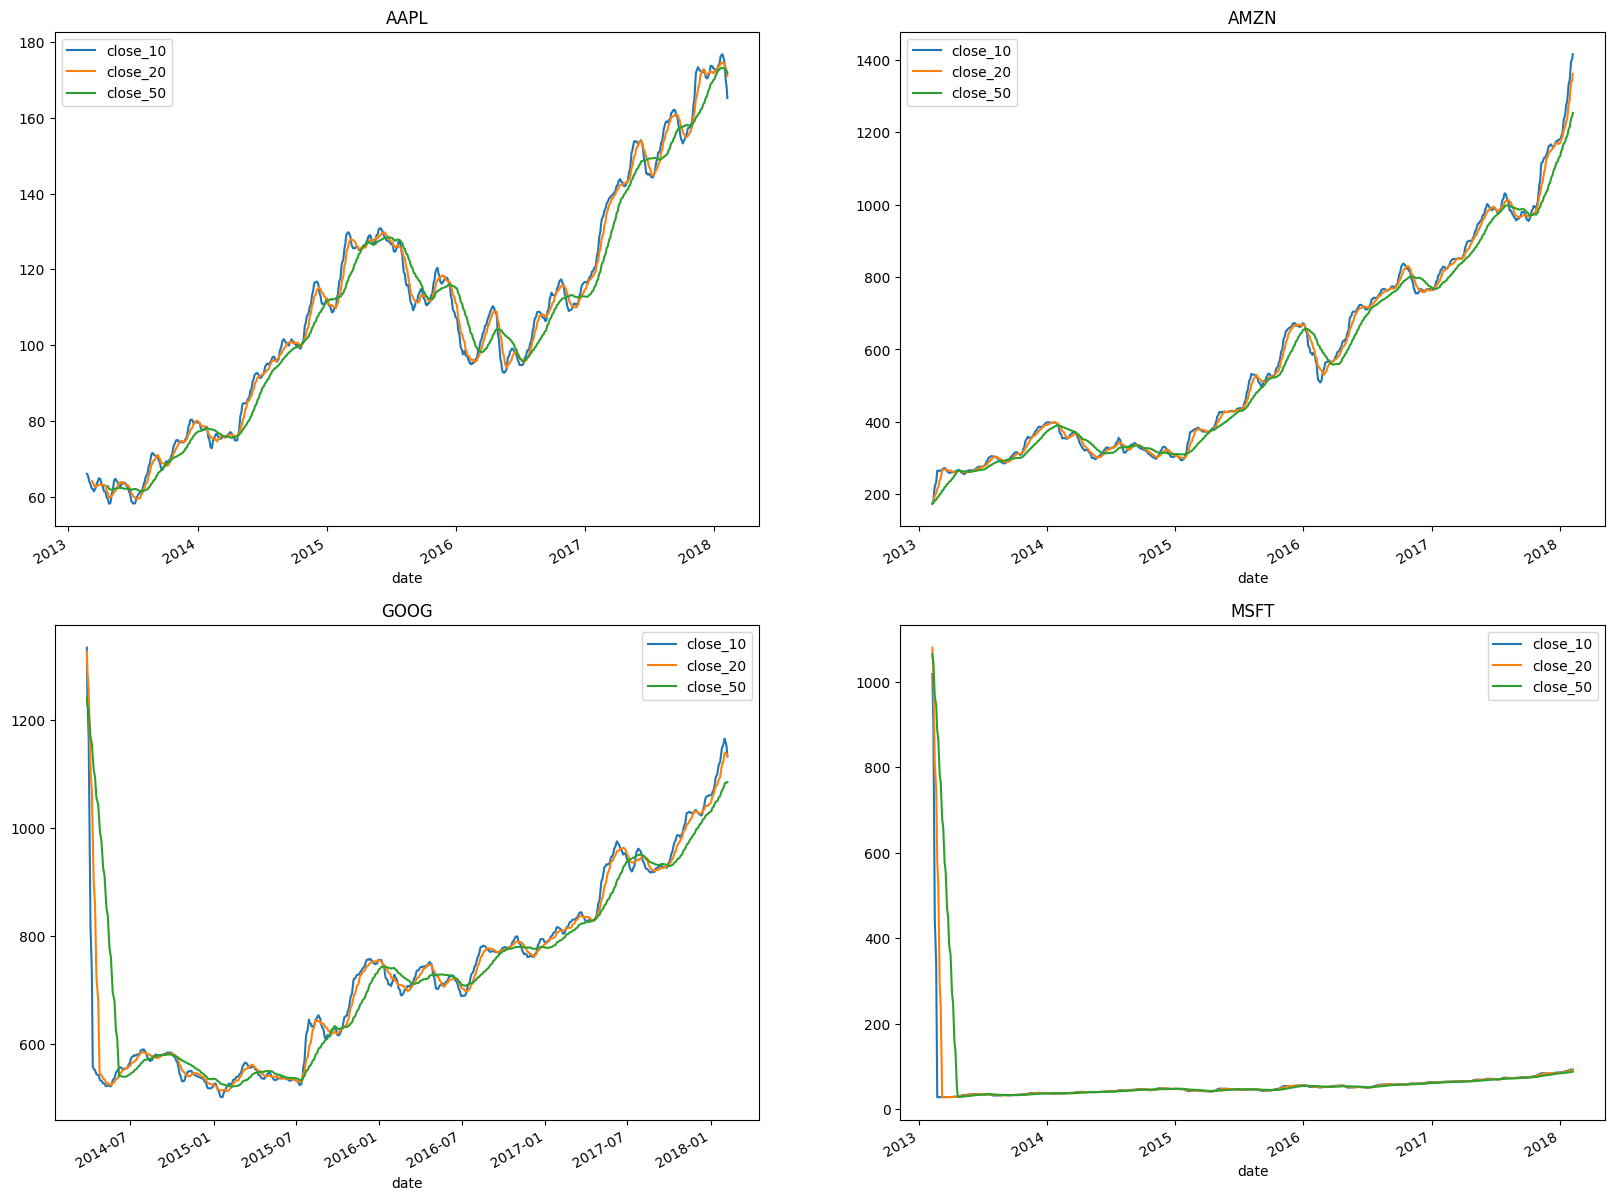

In [ ]:
plt.figure(figsize=(20, 16))

for index, company in enumerate (tech_list, 1):
    plt.subplot(2, 2, index)
    filter1 = new_data['Name'] == company
    df = new_data[filter1]
    df[['close_10', 'close_20', 'close_50']].plot(ax=plt.gca())
    plt.title(company)

# Analyse Closing Price change in Apple

Calling the file path again

In [ ]:
company_list

['/content/drive/MyDrive/Stock_Price_Datasets/individual_stocks_5yr/AAPL_data.csv',
 '/content/drive/MyDrive/Stock_Price_Datasets/individual_stocks_5yr/AMZN_data.csv',
 '/content/drive/MyDrive/Stock_Price_Datasets/individual_stocks_5yr/GOOG_data.csv',
 '/content/drive/MyDrive/Stock_Price_Datasets/individual_stocks_5yr/MSFT_data.csv']

Reads the Apple stock price dataset from the specified CSV file and stores it in a DataFrame named apple. And displaying the first 6 rows of the apple DataFrame.

In [ ]:
apple = pd.read_csv(r'/content/drive/MyDrive/Stock_Price_Datasets/individual_stocks_5yr/AAPL_data.csv')
apple.head(6)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL


Selecting the 'close' column from the apple DataFrame, which represents the closing prices of Apple stock.

In [ ]:
apple['close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: close, Length: 1259, dtype: float64

Calculating the daily percentage change in Apple's stock price ('close') and stores it in a new column named 'Daily return(in %)' in the apple DataFrame.

In [ ]:
apple['Daily return(in %)'] = apple['close'].pct_change()*100

#pct_change() returns: Percentage change b/w the current and a prior element

Displaying the first few rows of the apple DataFrame, now including the newly added 'Daily return(in %)' column.

In [ ]:
apple.head()

,date,open,high,low,close,volume,Name,Daily return(in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


Creating a line plot using Plotly Express (px) with dates on the x-axis ('date') and daily returns (in percentage) on the y-axis ('Daily return(in %)'). It visualizes the daily percentage changes in Apple's stock price over time.

In [ ]:
px.line(apple, x='date', y='Daily return(in %)')

# Performing Resampling Analysis of closing Price

Displaying the data types of each column in the apple DataFrame.

In [ ]:
apple.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
Daily return(in %)    float64
dtype: object

Converting the 'date' column in the apple DataFrame to datetime format using pd.to_datetime()

In [ ]:
apple['date'] = pd.to_datetime(apple['date'])

Again displaying the data types of each column in the apple DataFrame after converting the 'date' column.

In [ ]:
apple.dtypes

date                  datetime64[ns]
open                         float64
high                         float64
low                          float64
close                        float64
volume                         int64
Name                          object
Daily return(in %)           float64
dtype: object

Displaying the first few rows of the apple DataFrame to verify the changes made to the 'date' column.

In [ ]:
apple.head()

,date,open,high,low,close,volume,Name,Daily return(in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


Setting the 'date' column as the index of the apple DataFrame.

In [ ]:
apple.set_index('date', inplace=True)

Again displaying the first few rows of the apple DataFrame after setting the 'date' column as the index.

In [ ]:
apple.head()

,open,high,low,close,volume,Name,Daily return(in %)
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


**Resample Data on Monthly Basis**

Resampling the 'close' column of the apple DataFrame at a monthly frequency ('M') and calculates the mean closing price for each month.

In [ ]:
apple['close'].resample('M').mean()

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

Ploting the resampled monthly mean closing prices of Apple stock.

<Axes: xlabel='date'>

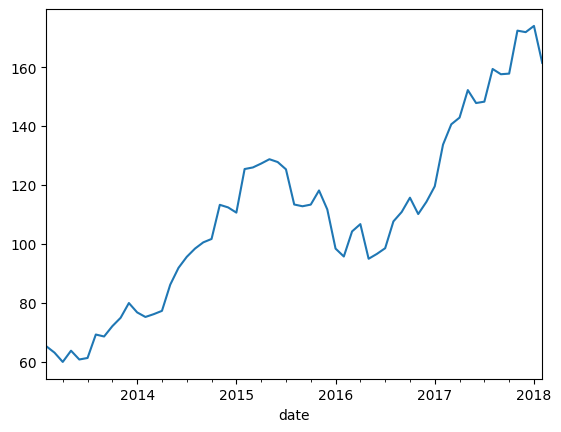

In [ ]:
apple['close'].resample('M').mean().plot()

**Resample Data on Yearly Basis**

Resampling the 'close' column of the apple DataFrame at a yearly frequency ('Y') and calculates the mean closing price for each year.

In [ ]:
apple['close'].resample('Y').mean()

date
2013-12-31     67.237839
2014-12-31     92.264531
2015-12-31    120.039861
2016-12-31    104.604008
2017-12-31    150.585080
2018-12-31    171.594231
Freq: A-DEC, Name: close, dtype: float64

Plot the resampled yearly mean closing prices of Apple stock.

<Axes: xlabel='date'>

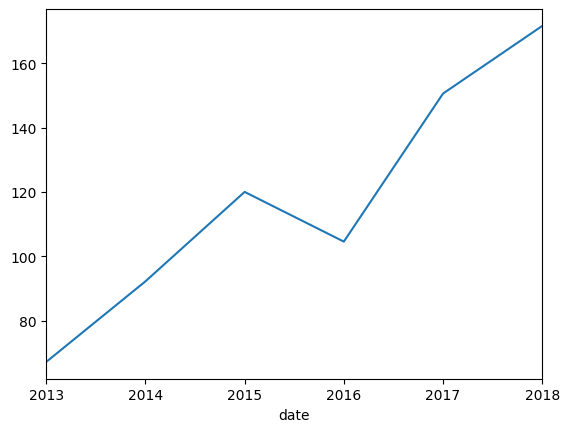

In [ ]:
apple['close'].resample('Y').mean().plot()

**Resample Data on Quarterly Basis**

Resampling the 'close' column of the apple DataFrame at a quarterly frequency ('Q') and calculates the mean closing price for each quarter.

In [ ]:
apple['close'].resample('Q').mean()

date
2013-03-31     64.020291
2013-06-30     61.534692
2013-09-30     66.320670
2013-12-31     75.567478
2014-03-31     76.086293
2014-06-30     85.117475
2014-09-30     98.163311
2014-12-31    108.821016
2015-03-31    120.776721
2015-06-30    127.937937
2015-09-30    117.303438
2015-12-31    114.299297
2016-03-31     99.655082
2016-06-30     99.401250
2016-09-30    105.866094
2016-12-31    113.399048
2017-03-31    131.712500
2017-06-30    147.875397
2017-09-30    155.304603
2017-12-31    167.148254
2018-03-31    171.594231
Freq: Q-DEC, Name: close, dtype: float64

Plot the resampled quarterly mean closing prices of Apple stock.

<Axes: xlabel='date'>

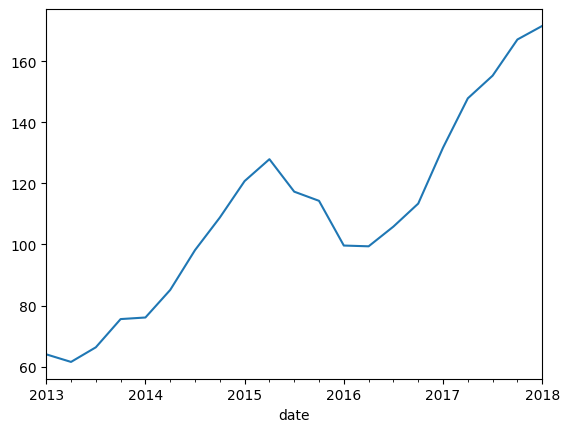

In [ ]:
apple['close'].resample('Q').mean().plot()

# Checking Closing Prices of Amazon, Apple, Google & Microsoft companies are correlated or not

Calling the file path again

In [ ]:
company_list

['/content/drive/MyDrive/Stock_Price_Datasets/individual_stocks_5yr/AAPL_data.csv',
 '/content/drive/MyDrive/Stock_Price_Datasets/individual_stocks_5yr/AMZN_data.csv',
 '/content/drive/MyDrive/Stock_Price_Datasets/individual_stocks_5yr/GOOG_data.csv',
 '/content/drive/MyDrive/Stock_Price_Datasets/individual_stocks_5yr/MSFT_data.csv']

Reading the CSV file at the first index of company_list into a DataFrame called app, representing the stock data for Apple, Amazon, Google and Microsoft.

In [ ]:
app = pd.read_csv(company_list[0])
amzn = pd.read_csv(company_list[1])
goog = pd.read_csv(company_list[2])
msft = pd.read_csv(company_list[3])

Creating an empty DataFrame called closing_price to store the closing prices of the four tech companies.

In [ ]:
closing_price = pd.DataFrame()

Assigning the 'close' column from each DataFrame (representing Apple, Amazon, Google, and Microsoft stock data) to corresponding columns ('apple_close', 'amazon_close', 'google_close', and 'microsoft_close') in the closing_price DataFrame.

In [ ]:
closing_price['apple_close'] = app['close']
closing_price['amazon_close'] = amzn['close']
closing_price['google_close'] = goog['close']
closing_price['microsoft_close'] = msft['close']

Displaying the closing_price DataFrame, showing the closing prices of the four tech companies.

In [ ]:
closing_price

,apple_close,amazon_close,google_close,microsoft_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04
...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26
1255,160.5000,1429.95,NaN,91.78
1256,156.4900,1390.00,NaN,88.00
1257,163.0300,1442.84,NaN,91.33


Creating a pairplot to visualize the pairwise relationships between the closing prices of the four tech companies.

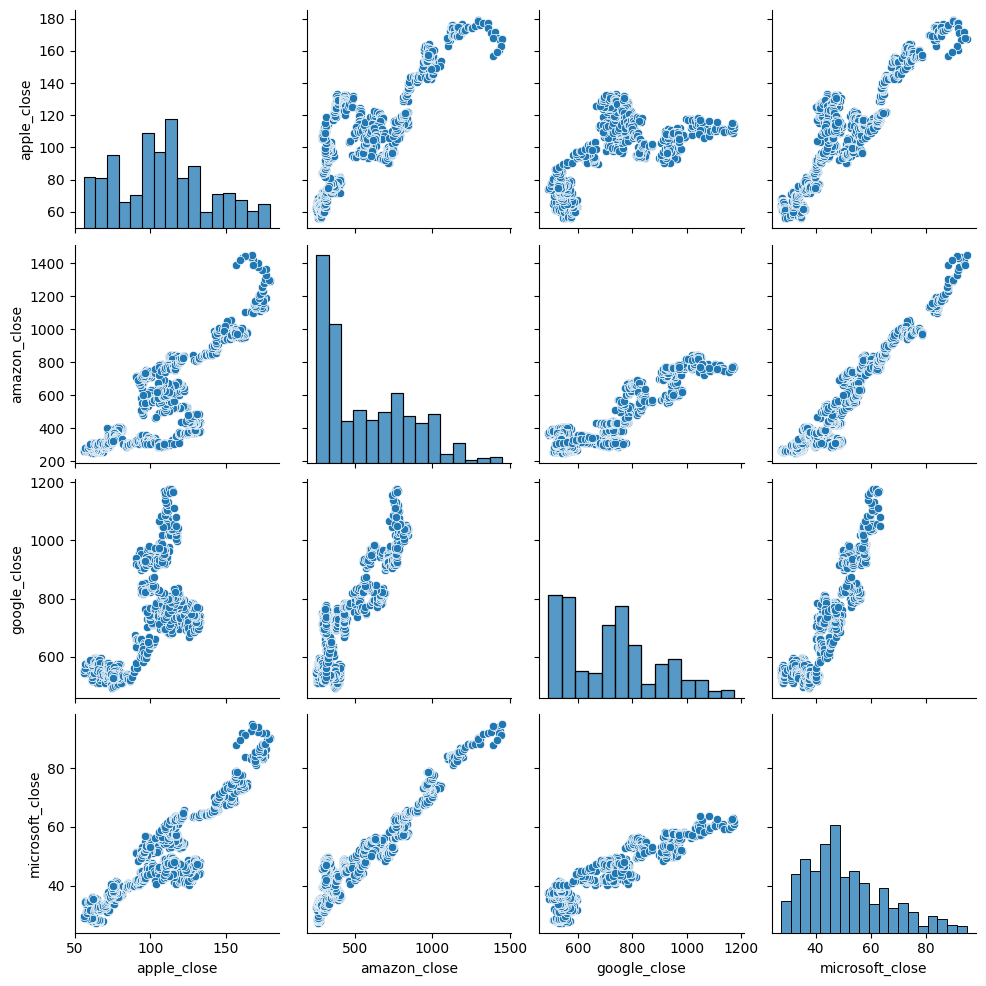

In [ ]:
sns.pairplot(closing_price)

Calculating the correlation matrix between the closing prices of the four tech companies.

In [ ]:
closing_price.corr()

,apple_close,amazon_close,google_close,microsoft_close
apple_close,1.000000,0.819078,0.640522,0.899689
amazon_close,0.819078,1.000000,0.888456,0.955977
google_close,0.640522,0.888456,1.000000,0.907011
microsoft_close,0.899689,0.955977,0.907011,1.000000


####Co-relation Plot for Stock Prices

Creating a heatmap to visualize the correlation matrix with annotations.

<Axes: >

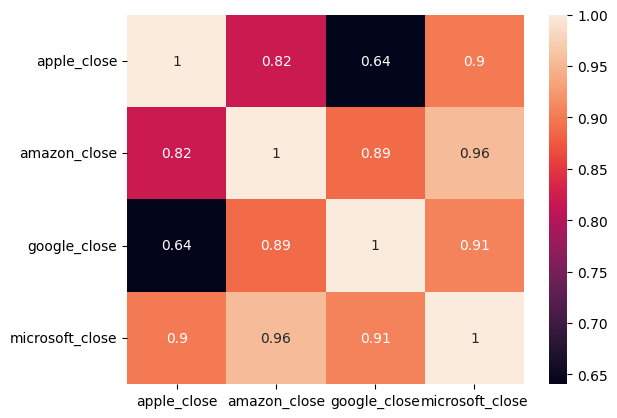

In [ ]:
sns.heatmap(closing_price.corr(), annot=True)

**Conclusions:**
Closing price of Google and Microsoft are well correlated & Closing price of Amazon and Microsoft have a co-relation of 0.96


# Correlation B/W Daily Changes in Closing Prices and Daily Returns of Stocks

Display the closing_price DataFrame.


In [ ]:
closing_price

,apple_close,amazon_close,google_close,microsoft_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04
...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26
1255,160.5000,1429.95,NaN,91.78
1256,156.4900,1390.00,NaN,88.00
1257,163.0300,1442.84,NaN,91.33


Displaying the 'apple_close' column from the closing_price DataFrame.

In [ ]:
closing_price['apple_close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: apple_close, Length: 1259, dtype: float64

Displaying the 'apple_close' column from the closing_price DataFrame, shifted by one position.

In [ ]:
closing_price['apple_close'].shift(1)

0            NaN
1        67.8542
2        68.5614
3        66.8428
4        66.7156
          ...   
1254    167.4300
1255    167.7800
1256    160.5000
1257    156.4900
1258    163.0300
Name: apple_close, Length: 1259, dtype: float64

Calculating the percentage change of the 'apple_close' column in the closing_price DataFrame relative to the previous day's closing price.

In [ ]:
(closing_price['apple_close'] - closing_price['apple_close'].shift(1))/closing_price['apple_close'].shift(1) * 100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: apple_close, Length: 1259, dtype: float64

Returns the column names of the closing_price DataFrame.

In [ ]:
closing_price.columns

Index(['apple_close', 'amazon_close', 'google_close', 'microsoft_close'], dtype='object')

Iterate over each column name in the closing_price DataFrame. And calculating the percentage change for each column in the closing_price DataFrame and adds a new column with the '_pct_change' suffix to the column name.

In [ ]:
for col in closing_price.columns:
   closing_price[col + '_pct_change'] = (closing_price[col] - closing_price[col].shift(1))/closing_price[col].shift(1) * 100

Displaying the closing_price DataFrame.

In [ ]:
closing_price

,apple_close,amazon_close,google_close,microsoft_close,apple_close_pct_change,amazon_close_pct_change,google_close_pct_change,microsoft_close_pct_change
0,67.8542,261.95,558.46,27.55,NaN,NaN,NaN,NaN
1,68.5614,257.21,559.99,27.86,1.042235,-1.809506,0.273968,1.125227
2,66.8428,258.70,556.97,27.88,-2.506658,0.579293,-0.539295,0.071788
3,66.7156,269.47,567.16,28.03,-0.190297,4.163123,1.829542,0.538020
4,66.6556,269.24,567.00,28.04,-0.089934,-0.085353,-0.028211,0.035676
...,...,...,...,...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26,0.209043,-4.196734,NaN,-0.789391
1255,160.5000,1429.95,NaN,91.78,-4.339015,2.874101,NaN,-2.631021
1256,156.4900,1390.00,NaN,88.00,-2.498442,-2.793804,NaN,-4.118544
1257,163.0300,1442.84,NaN,91.33,4.179181,3.801439,NaN,3.784091


Returns the column names of the closing_price DataFrame.

In [ ]:
closing_price.columns

Index(['apple_close', 'amazon_close', 'google_close', 'microsoft_close',
       'apple_close_pct_change', 'amazon_close_pct_change',
       'google_close_pct_change', 'microsoft_close_pct_change'],
      dtype='object')

Creating a new DataFrame called closing_p containing only the columns related to the percentage change in closing prices for Apple, Amazon, Google, and Microsoft stocks.

In [ ]:
closing_p = closing_price[['apple_close_pct_change', 'amazon_close_pct_change',
       'google_close_pct_change', 'microsoft_close_pct_change']]

Displaying a DataFrame containing the percentage change columns for each stock.

In [ ]:
closing_p

,apple_close_pct_change,amazon_close_pct_change,google_close_pct_change,microsoft_close_pct_change
0,NaN,NaN,NaN,NaN
1,1.042235,-1.809506,0.273968,1.125227
2,-2.506658,0.579293,-0.539295,0.071788
3,-0.190297,4.163123,1.829542,0.538020
4,-0.089934,-0.085353,-0.028211,0.035676
...,...,...,...,...
1254,0.209043,-4.196734,NaN,-0.789391
1255,-4.339015,2.874101,NaN,-2.631021
1256,-2.498442,-2.793804,NaN,-4.118544
1257,4.179181,3.801439,NaN,3.784091


Initializing a PairGrid object for visualizing pairwise relationships in the closing_p DataFrame. Mapping a histogram plot to the diagonal of the PairGrid object. Mapping a scatter plot to the lower triangle of the PairGrid object. Mapping a kernel density estimate plot to the upper triangle of the PairGrid object.

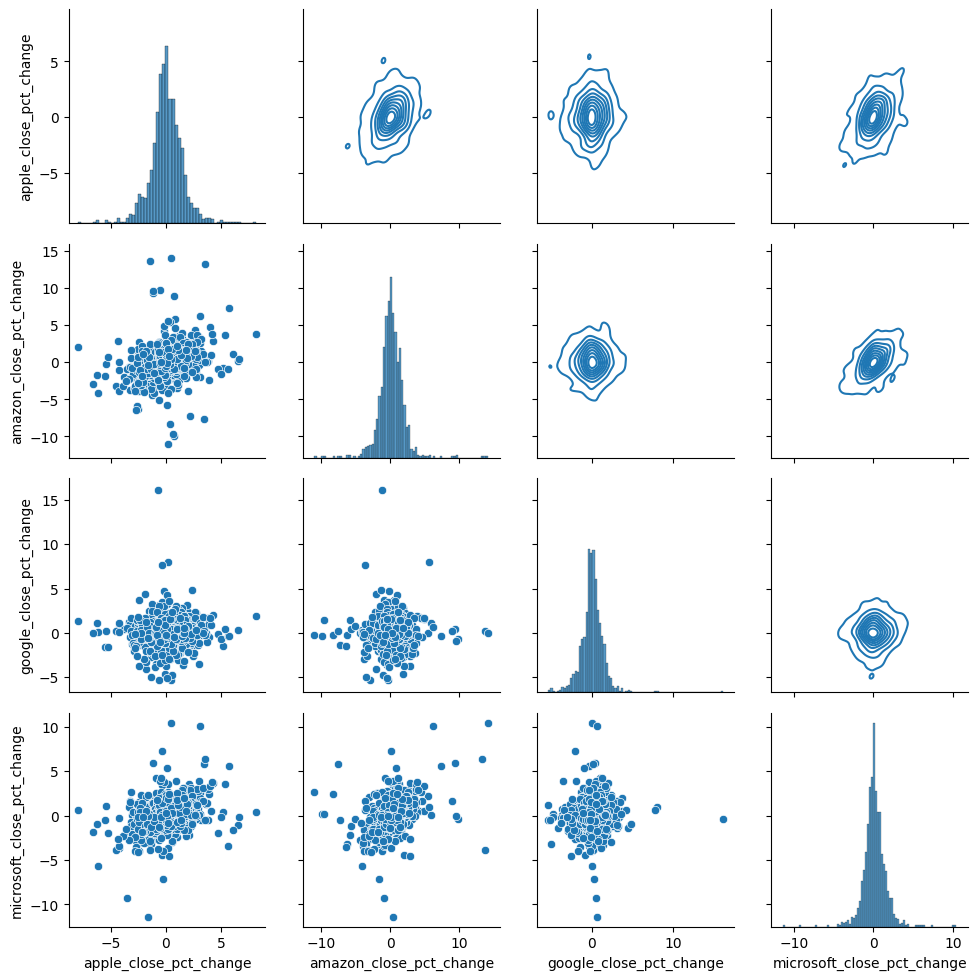

In [ ]:
g = sns.PairGrid(data=closing_p)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

**Conclusion:**

While Comparing 'apple_close_pct_change' to 'amazon_close_pct_change'  , it shows a linear relationship upto some extent..

Computes the correlation matrix for the closing_p DataFrame.

In [ ]:
closing_p.corr()

,apple_close_pct_change,amazon_close_pct_change,google_close_pct_change,microsoft_close_pct_change
apple_close_pct_change,1.000000,0.287659,0.036202,0.366598
amazon_close_pct_change,0.287659,1.000000,0.027698,0.402678
google_close_pct_change,0.036202,0.027698,1.000000,0.038939
microsoft_close_pct_change,0.366598,0.402678,0.038939,1.000000


# Summary & Conclusions

The project analysis focused on examining the historical stock prices of several tech companies, including Apple, Amazon, Google, and Microsoft. Various techniques such as data visualization, statistical analysis, and correlation were employed to gain insights into market trends, volatility, and potential investment opportunities.


The analysis includes the following steps:


1. **Data Collection and Preparation:** Importing necessary libraries, collecting CSV files of stock data, and combining them into a single DataFrame.

2. **Basic Data Exploration:** Checking the structure, types, and summary statistics of the data.

3. **Data Cleaning:** Handling missing values and converting date columns to appropriate formats.

4. **Visual Analysis of Stock Prices:** Plotting the closing prices over time for each company.

5. **Moving Average Calculation:** Computing 10, 20, and 50-day moving averages to smooth out price fluctuations.

6. **Correlation Analysis:** Evaluating the correlation between closing prices of the different companies and visualizing it using pair plots and heatmaps.

7. **Daily Percentage Change Analysis:** Calculating daily percentage changes in closing prices and examining the relationships between these changes.

> ***Key Findings***
* **Trend Analysis:** Visualizing the stock price trends revealed fluctuations over time, with periods of growth, decline, and stability observed across all companies.
* **Correlation Analysis:** The correlation matrix and heatmap showed the relationships between the stock prices of different companies. Strong correlations were found among certain pairs, indicating synchronized movements in their prices.
* **Percentage Change Analysis:** Calculating the percentage change in stock prices provided insights into the volatility and relative performance of each company. It highlighted periods of significant growth or decline.
* **Pairwise Comparison:** Pairwise comparisons of percentage changes allowed for a deeper understanding of the relationships between stock price movements, enabling investors to identify potential trading opportunities.

**Overall, the analysis demonstrated the importance of comprehensive data analysis techniques in understanding stock market dynamics. Investors can leverage these insights to make informed decisions regarding portfolio management, risk assessment, and trading strategies.**

---

**Conclusions:**

The stock prices of tech companies exhibit complex patterns influenced by various factors such as market sentiment, economic conditions, and company-specific news. Correlation analysis helps identify stocks that move together, offering diversification opportunities or pairs trading strategies. Monitoring percentage changes provides valuable insights into the relative performance of different stocks and sectors, aiding in portfolio rebalancing and risk management. Data-driven analysis enhances investors' ability to navigate the dynamic and unpredictable nature of the stock market, ultimately contributing to better investment outcomes and financial success.